## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_fin_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.063096
Name: time, dtype: float64

In [4]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    0.063096
1    0.056679
2    0.063818
3    0.058371
4    0.054866
5    0.063876
6    0.065286
7    0.065747
8    0.067061
9    0.105594
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    0.066439
dtype: float64

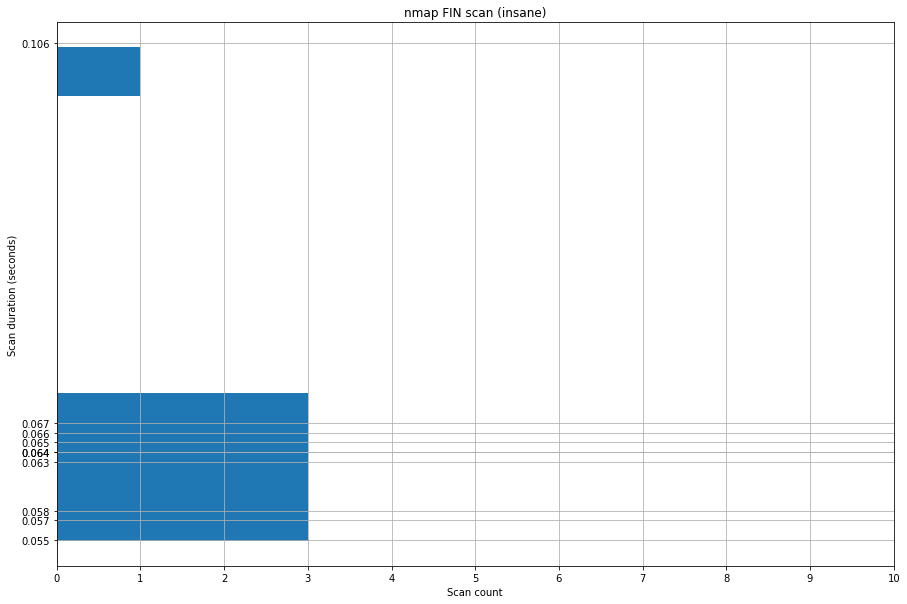

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,0.066439
std,0.014353
min,0.054866
25%,0.059552
50%,0.063847
75%,0.065632
max,0.105594


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1328.7878036499023



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 53787 8888
2 53787 3389
3 53787 110
4 53787 113
5 53787 256
6 53787 111
7 53787 443
8 53787 587
9 53787 199
10 53787 25
11 53787 21
12 53787 23
13 53787 1723
14 53787 5900
15 53787 8080
16 53787 554
17 53787 53
18 53787 3306
19 53787 995
20 53787 993
21 53787 445
22 53787 143
23 53787 1720
24 53787 1025
25 53787 139
26 53787 135
27 53787 80
28 53787 22
29 53787 646
30 53787 90
31 53787 50002
32 53787 3283
33 53787 5226
34 53787 5960
35 53787 1089
36 53787 22939
37 53787 7070
38 53787 1641
39 53787 3371
40 53787 5906
41 53787 366
42 53787 7103
43 53787 5033
44 53787 34573
45 53787 1107
46 53787 2875
47 53787 5280
48 53787 8701
49 53787 264
50 53787 3324
51 53787 8031
52 53787 2522
53 53787 18101
54 53787 10626
55 53787 843
56 53787 25734
57 53787 2135
58 53787 705
59 53787 51103
60 53787 32781
61 53787 5051
62 53787 1234
63 53787 4445
64 53787 1862
65 53787 7911
66 53787 1914
67 53787 1122
68 53787 873
69 53787 16000
70 53787 88
71 53787 1064
72 53787 50636
73 53787 5225
74 53787 2006

594 53787 6510
595 53787 33
596 53787 1000
597 53787 1935
598 53787 1149
599 53787 13722
600 53787 2107
601 53787 5544
602 53787 515
603 53787 8009
604 53787 416
605 53787 32780
606 53787 6788
607 53787 8180
608 53787 563
609 53787 800
610 53787 222
611 53787 765
612 53787 2049
613 53787 1105
614 53787 5915
615 53787 12174
616 53787 2602
617 53787 70
618 53787 8649
619 53787 8291
620 53787 26
621 53787 52673
622 53787 5678
623 53787 1099
624 53787 9102
625 53787 1117
626 53787 4045
627 53787 5877
628 53787 311
629 53787 6002
630 53787 5510
631 53787 15003
632 53787 8600
633 53787 3918
634 53787 711
635 53787 3995
636 53787 85
637 53787 1058
638 53787 49153
639 53787 161
640 53787 700
641 53787 3005
642 53787 3301
643 53787 1594
644 53787 1417
645 53787 13
646 53787 8333
647 53787 524
648 53787 687
649 53787 5101
650 53787 1687
651 53787 7100
652 53787 1503
653 53787 667
654 53787 7921
655 53787 2040
656 53787 9943
657 53787 144
658 53787 20031
659 53787 5801
660 53787 2288
661 53787 80

574 51627 7741
575 51627 9000
576 51627 222
577 51627 1334
578 51627 9080
579 51627 109
580 51627 16113
581 51627 5050
582 51627 9503
583 51627 4
584 51627 4126
585 51627 15660
586 51627 5925
587 51627 720
588 51627 55600
589 51627 5730
590 51627 9898
591 51627 1
592 51627 1081
593 51627 2004
594 51627 1213
595 51627 6565
596 51627 3001
597 51627 19283
598 51627 9102
599 51627 6669
600 51627 1583
601 51627 5405
602 51627 15002
603 51627 1443
604 51627 5510
605 51627 2607
606 51627 10082
607 51627 2800
608 51627 32783
609 51627 2500
610 51627 10000
611 51627 2160
612 51627 5862
613 51627 24800
614 51627 9877
615 51627 2383
616 51627 7
617 51627 1030
618 51627 1501
619 51627 8011
620 51627 13783
621 51627 3372
622 51627 4004
623 51627 9111
624 51627 8651
625 51627 8873
626 51627 30
627 51627 1048
628 51627 3809
629 51627 4900
630 51627 1112
631 51627 1085
632 51627 1169
633 51627 3052
634 51627 8192
635 51627 49157
636 51627 427
637 51627 1067
638 51627 902
639 51627 1031
640 51627 32780

268 33720 49176
269 33720 5960
270 33720 1063
271 33720 5801
272 33720 49156
273 33720 49167
274 33720 32769
275 33720 5002
276 33720 17988
277 33720 49163
278 33720 9090
279 33720 5003
280 33720 1233
281 33720 30718
282 33720 5280
283 33720 8002
284 33720 1092
285 33720 3690
286 33720 1494
287 33720 10009
288 33720 9878
289 33720 1051
290 33720 8084
291 33720 683
292 33720 9003
293 33720 5988
294 33720 427
295 33720 2601
296 33720 26
297 33720 35500
298 33720 1309
299 33720 9100
300 33720 3283
301 33720 4129
302 33720 5080
303 33720 9009
304 33720 691
305 33720 9876
306 33720 41511
307 33720 1417
308 33720 544
309 33720 1043
310 33720 2030
311 33720 8022
312 33720 10004
313 33720 7007
314 33720 6901
315 33720 1183
316 33720 1104
317 33720 2910
318 33720 1145
319 33720 1095
320 33720 481
321 33720 5718
322 33720 49161
323 33720 1174
324 33720 8089
325 33720 2608
326 33720 1812
327 33720 2875
328 33720 3659
329 33720 13722
330 33720 31337
331 33720 6667
332 33720 3007
333 33720 2604
334

289 61269 3052
290 61269 5631
291 61269 1068
292 61269 1152
293 61269 1102
294 61269 9929
295 61269 1046
296 61269 765
297 61269 40911
298 61269 51103
299 61269 33
300 61269 3221
301 61269 5190
302 61269 777
303 61269 3390
304 61269 5903
305 61269 3031
306 61269 9100
307 61269 3322
308 61269 1042
309 61269 1078
310 61269 389
311 61269 2382
312 61269 7007
313 61269 1027
314 61269 3914
315 61269 6881
316 61269 32782
317 61269 1029
318 61269 65129
319 61269 5087
320 61269 50300
321 61269 2399
322 61269 32769
323 61269 9040
324 61269 1070
325 61269 49160
326 61269 2710
327 61269 5952
328 61269 3737
329 61269 2401
330 61269 10004
331 61269 3801
332 61269 44442
333 61269 5001
334 61269 8600
335 61269 1110
336 61269 5226
337 61269 1131
338 61269 2041
339 61269 6789
340 61269 9503
341 61269 3001
342 61269 5225
343 61269 3000
344 61269 16000
345 61269 1149
346 61269 8333
347 61269 901
348 61269 8254
349 61269 5432
350 61269 616
351 61269 3580
352 61269 163
353 61269 5810
354 61269 16080
355 612

895 61269 5000
896 61269 33354
897 61269 65389
898 61269 6969
899 61269 416
900 61269 1503
901 61269 50800
902 61269 465
903 61269 32770
904 61269 8087
905 61269 2035
906 61269 2001
907 61269 1862
908 61269 2200
909 61269 6007
910 61269 32774
911 61269 9009
912 61269 109
913 61269 7920
914 61269 6005
915 61269 3880
916 61269 2323
917 61269 7999
918 61269 6002
919 61269 3851
920 61269 32777
921 61269 50002
922 61269 1055
923 61269 31337
924 61269 55056
925 61269 6059
926 61269 2161
927 61269 5822
928 61269 6668
929 61269 1175
930 61269 1311
931 61269 2107
932 61269 9003
933 61269 1277
934 61269 20221
935 61269 5730
936 61269 8090
937 61269 63331
938 61269 45100
939 61269 1216
940 61269 4045
941 61269 1083
942 61269 5102
943 61269 6666
944 61269 691
945 61269 3551
946 61269 999
947 61269 144
948 61269 1137
949 61269 11967
950 61269 1151
951 61269 1085
952 61269 54045
953 61269 49152
954 61269 5298
955 61269 1296
956 61269 2046
957 61269 8701
958 61269 2394
959 61269 27356
960 61269 3689


455 62134 1098
456 62134 5269
457 62134 49152
458 62134 1065
459 62134 8181
460 62134 8089
461 62134 5544
462 62134 6346
463 62134 49159
464 62134 7200
465 62134 2393
466 62134 5825
467 62134 4567
468 62134 1198
469 62134 1036
470 62134 2522
471 62134 3211
472 62134 37
473 62134 10621
474 62134 2105
475 62134 2042
476 62134 416
477 62134 5862
478 62134 4321
479 62134 714
480 62134 27000
481 62134 5226
482 62134 24
483 62134 49165
484 62134 3998
485 62134 2381
486 62134 13783
487 62134 79
488 62134 1073
489 62134 563
490 62134 3851
491 62134 1244
492 62134 1700
493 62134 9502
494 62134 3333
495 62134 99
496 62134 3918
497 62134 2043
498 62134 2170
499 62134 32781
500 62134 64623
501 62134 1287
502 62134 8021
503 62134 2121
504 62134 10000
505 62134 212
506 62134 62078
507 62134 1071
508 62134 1328
509 62134 50500
510 62134 6510
511 62134 119
512 62134 35500
513 62134 6106
514 62134 32769
515 62134 1556
516 62134 2920
517 62134 3814
518 62134 6839
519 62134 1185
520 62134 1434
521 62134 

109 60249 4006
110 60249 10616
111 60249 5801
112 60249 1433
113 60249 9
114 60249 4443
115 60249 5718
116 60249 125
117 60249 5225
118 60249 1072
119 60249 2045
120 60249 3011
121 60249 5960
122 60249 2381
123 60249 15003
124 60249 5959
125 60249 5432
126 60249 8010
127 60249 1947
128 60249 5087
129 60249 24444
130 60249 9998
131 60249 2525
132 60249 2121
133 60249 2382
134 60249 11967
135 60249 4998
136 60249 4444
137 60249 144
138 60249 5850
139 60249 1002
140 60249 10621
141 60249 3268
142 60249 13783
143 60249 34571
144 60249 16018
145 60249 6005
146 60249 8193
147 60249 458
148 60249 49161
149 60249 5952
150 60249 3128
151 60249 5911
152 60249 2035
153 60249 1494
154 60249 26
155 60249 49175
156 60249 4224
157 60249 4848
158 60249 2030
159 60249 1107
160 60249 4899
161 60249 49160
162 60249 1138
163 60249 1580
164 60249 691
165 60249 2920
166 60249 2288
167 60249 1024
168 60249 1533
169 60249 19283
170 60249 7937
171 60249 2909
172 60249 1042
173 60249 13782
174 60249 55555
175 6

234 49288 2010
235 49288 8085
236 49288 1066
237 49288 49160
238 49288 7921
239 49288 3367
240 49288 55055
241 49288 32784
242 49288 3322
243 49288 19780
244 49288 6510
245 49288 49161
246 49288 6101
247 49288 4001
248 49288 3869
249 49288 5054
250 49288 34572
251 49288 30
252 49288 2021
253 49288 8400
254 49288 617
255 49288 3871
256 49288 5560
257 49288 7025
258 49288 3323
259 49288 1192
260 49288 3690
261 49288 5087
262 49288 1687
263 49288 8443
264 49288 1111
265 49288 3580
266 49288 37
267 49288 7627
268 49288 7920
269 49288 5033
270 49288 1455
271 49288 3013
272 49288 9502
273 49288 513
274 49288 222
275 49288 2022
276 49288 616
277 49288 1700
278 49288 9594
279 49288 6346
280 49288 15660
281 49288 4004
282 49288 50500
283 49288 83
284 49288 19801
285 49288 1081
286 49288 5911
287 49288 1641
288 49288 1863
289 49288 9485
290 49288 5280
291 49288 17877
292 49288 1533
293 49288 5962
294 49288 3809
295 49288 40911
296 49288 1434
297 49288 1443
298 49288 52848
299 49288 9968
300 4928

787 49288 1054
788 49288 667
789 49288 2602
790 49288 1048
791 49288 1594
792 49288 27353
793 49288 45100
794 49288 2382
795 49288 16080
796 49288 1083
797 49288 1050
798 49288 58080
799 49288 49163
800 49288 2040
801 49288 2030
802 49288 9207
803 49288 56738
804 49288 4125
805 49288 999
806 49288 3071
807 49288 3527
808 49288 1272
809 49288 63331
810 49288 64623
811 49288 9100
812 49288 5960
813 49288 1277
814 49288 5222
815 49288 1165
816 49288 1027
817 49288 465
818 49288 50002
819 49288 3077
820 49288 50001
821 49288 3324
822 49288 6000
823 49288 7937
824 49288 1024
825 49288 17
826 49288 7
827 49288 4003
828 49288 1971
829 49288 1352
830 49288 2702
831 49288 15000
832 49288 4343
833 49288 90
834 49288 2800
835 49288 541
836 49288 1073
837 49288 5225
838 49288 1105
839 49288 1137
840 49288 2041
841 49288 2004
842 49288 6699
843 49288 6668
844 49288 2013
845 49288 1130
846 49288 3404
847 49288 31038
848 49288 9002
849 49288 5859
850 49288 14441
851 49288 10004
852 49288 2701
853 492

454 61171 45100
455 61171 3261
456 61171 1163
457 61171 444
458 61171 1580
459 61171 616
460 61171 7999
461 61171 50500
462 61171 1174
463 61171 1051
464 61171 801
465 61171 6839
466 61171 425
467 61171 2191
468 61171 10000
469 61171 2725
470 61171 5962
471 61171 3995
472 61171 1032
473 61171 8402
474 61171 1085
475 61171 5030
476 61171 902
477 61171 1310
478 61171 4242
479 61171 1126
480 61171 4002
481 61171 109
482 61171 1087
483 61171 49153
484 61171 8873
485 61171 5989
486 61171 1217
487 61171 2323
488 61171 1071
489 61171 3998
490 61171 8090
491 61171 179
492 61171 1141
493 61171 49175
494 61171 84
495 61171 49157
496 61171 2399
497 61171 5061
498 61171 1666
499 61171 7025
500 61171 49167
501 61171 5003
502 61171 3031
503 61171 49159
504 61171 1198
505 61171 12174
506 61171 2040
507 61171 3001
508 61171 1043
509 61171 6689
510 61171 9090
511 61171 10628
512 61171 10215
513 61171 28201
514 61171 3580
515 61171 6779
516 61171 1082
517 61171 9418
518 61171 163
519 61171 1048
520 6117

120 64458 1047
121 64458 711
122 64458 1054
123 64458 1082
124 64458 13722
125 64458 3007
126 64458 1063
127 64458 5033
128 64458 3784
129 64458 1812
130 64458 6881
131 64458 2394
132 64458 32768
133 64458 14238
134 64458 7938
135 64458 2022
136 64458 49154
137 64458 27715
138 64458 9666
139 64458 548
140 64458 5800
141 64458 9943
142 64458 444
143 64458 9099
144 64458 1259
145 64458 49157
146 64458 9290
147 64458 10243
148 64458 1114
149 64458 49160
150 64458 555
151 64458 765
152 64458 2191
153 64458 5004
154 64458 3995
155 64458 16000
156 64458 2111
157 64458 1840
158 64458 2006
159 64458 2007
160 64458 1137
161 64458 5101
162 64458 5901
163 64458 264
164 64458 8084
165 64458 1600
166 64458 1027
167 64458 5822
168 64458 3703
169 64458 9877
170 64458 8292
171 64458 146
172 64458 1086
173 64458 55055
174 64458 1434
175 64458 5877
176 64458 27355
177 64458 1494
178 64458 3809
179 64458 3369
180 64458 32781
181 64458 7627
182 64458 1999
183 64458 1524
184 64458 1145
185 64458 898
186 64

787 64458 6779
788 64458 1201
789 64458 2608
790 64458 6669
791 64458 85
792 64458 1119
793 64458 89
794 64458 81
795 64458 1084
796 64458 55056
797 64458 1106
798 64458 464
799 64458 20005
800 64458 5000
801 64458 9595
802 64458 8087
803 64458 366
804 64458 5911
805 64458 1026
806 64458 3351
807 64458 24444
808 64458 3546
809 64458 8192
810 64458 4006
811 64458 23502
812 64458 1083
813 64458 2190
814 64458 6006
815 64458 50500
816 64458 5962
817 64458 1061
818 64458 425
819 64458 7019
820 64458 2725
821 64458 8291
822 64458 49176
823 64458 17
824 64458 1300
825 64458 8008
826 64458 3322
827 64458 2004
828 64458 1717
829 64458 5987
830 64458 2047
831 64458 7911
832 64458 18988
833 64458 1687
834 64458 6839
835 64458 26
836 64458 8333
837 64458 10012
838 64458 7435
839 64458 7937
840 64458 1097
841 64458 10180
842 64458 1863
843 64458 705
844 64458 5414
845 64458 3052
846 64458 26214
847 64458 1580
848 64458 54328
849 64458 3301
850 64458 1032
851 64458 512
852 64458 5678
853 64458 4916

411 47394 7937
412 47394 32778
413 47394 65389
414 47394 5200
415 47394 5060
416 47394 32773
417 47394 9575
418 47394 5915
419 47394 8021
420 47394 2608
421 47394 49400
422 47394 1216
423 47394 2048
424 47394 2191
425 47394 27715
426 47394 1244
427 47394 4111
428 47394 1126
429 47394 1045
430 47394 1805
431 47394 8042
432 47394 5666
433 47394 9207
434 47394 1434
435 47394 16080
436 47394 2909
437 47394 1083
438 47394 58080
439 47394 3013
440 47394 8873
441 47394 6792
442 47394 2393
443 47394 8081
444 47394 15660
445 47394 100
446 47394 1089
447 47394 7103
448 47394 1864
449 47394 1011
450 47394 3801
451 47394 1524
452 47394 8254
453 47394 4045
454 47394 1309
455 47394 54045
456 47394 5280
457 47394 1076
458 47394 8200
459 47394 19283
460 47394 99
461 47394 8180
462 47394 8899
463 47394 1001
464 47394 5811
465 47394 9011
466 47394 19350
467 47394 1151
468 47394 5988
469 47394 691
470 47394 4899
471 47394 2106
472 47394 7025
473 47394 12265
474 47394 5678
475 47394 3945
476 47394 5815
47

In [14]:
orders_port

,scannr,sport,dport
0,1,53787,8888
1,2,53787,3389
2,3,53787,110
3,4,53787,113
4,5,53787,256
...,...,...,...
9995,996,47394,1154
9996,997,47394,4443
9997,998,47394,6005
9998,999,47394,19101


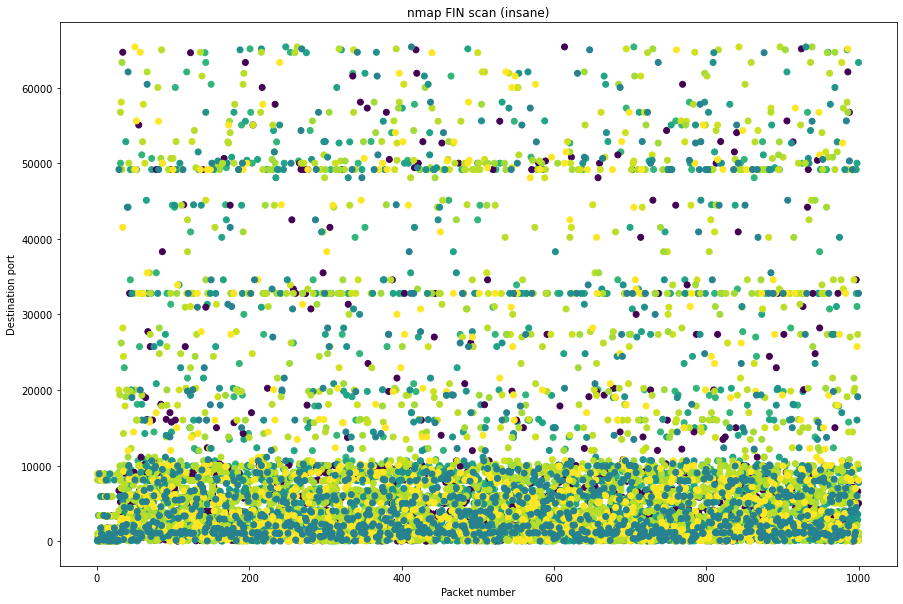

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

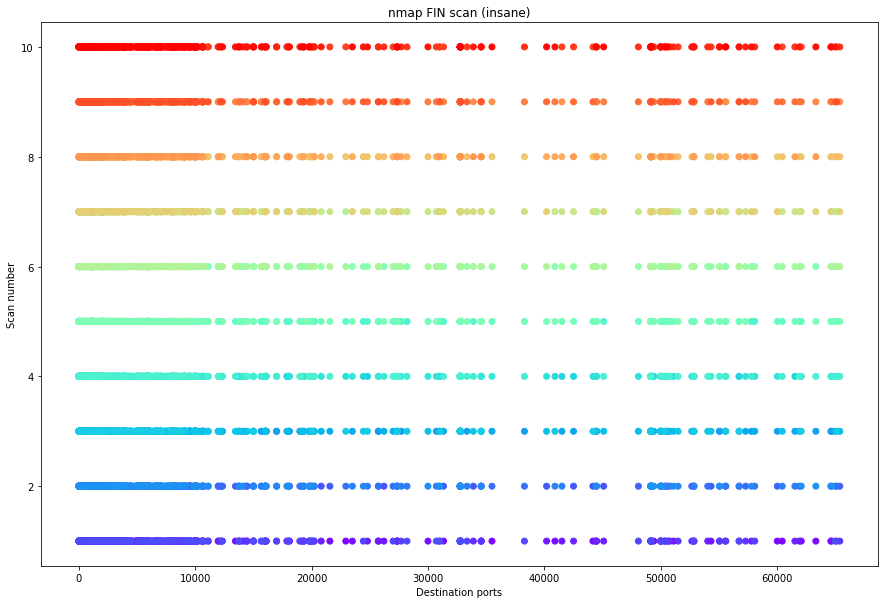

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

In [19]:
unused_ports = []
used_ports = []
for x in range(1, 65536):
    if x not in tcp_dports:
        unused_ports.append(x)
    elif x in tcp_dports:
        used_ports.append(x)

In [20]:
print(len(unused_ports))

64535


In [21]:
print(len(used_ports))

1000


## Payloads

In [22]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

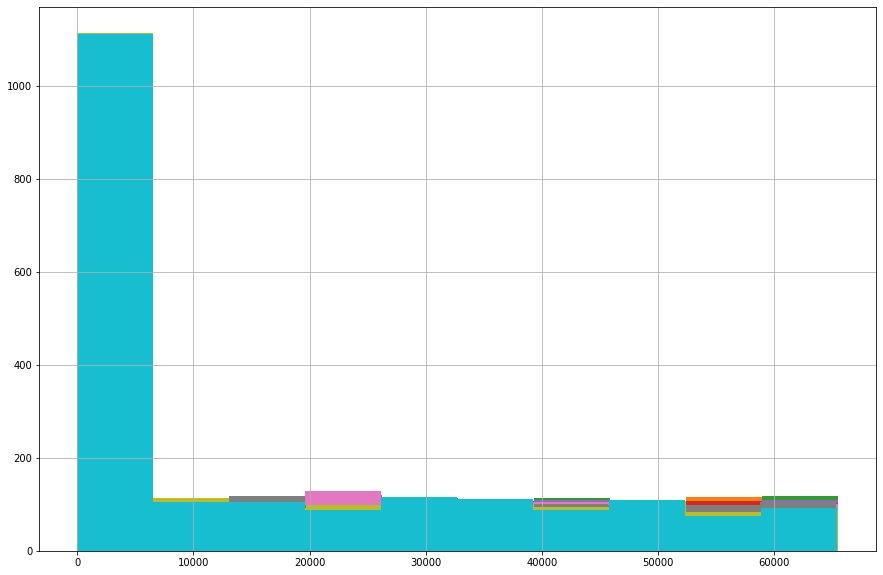

In [23]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

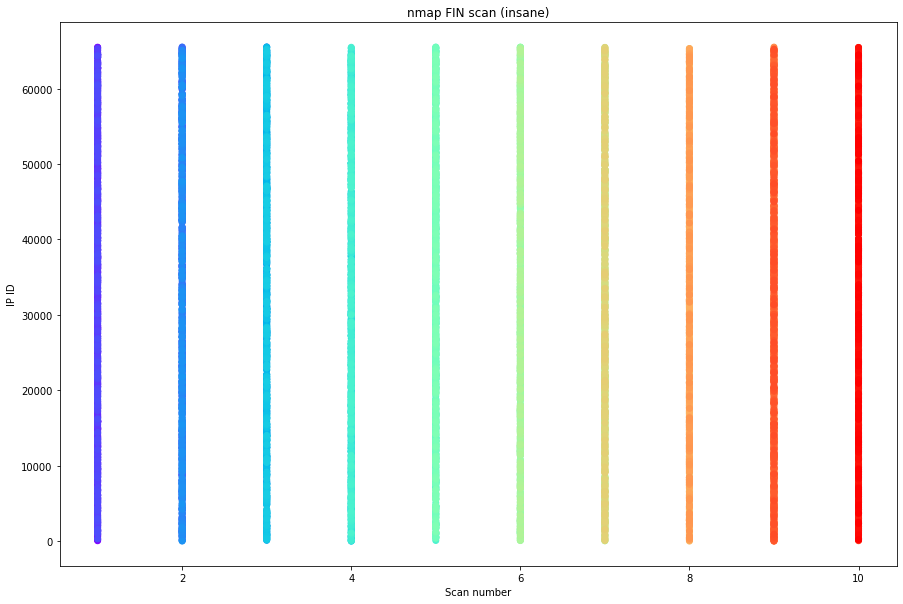

In [24]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

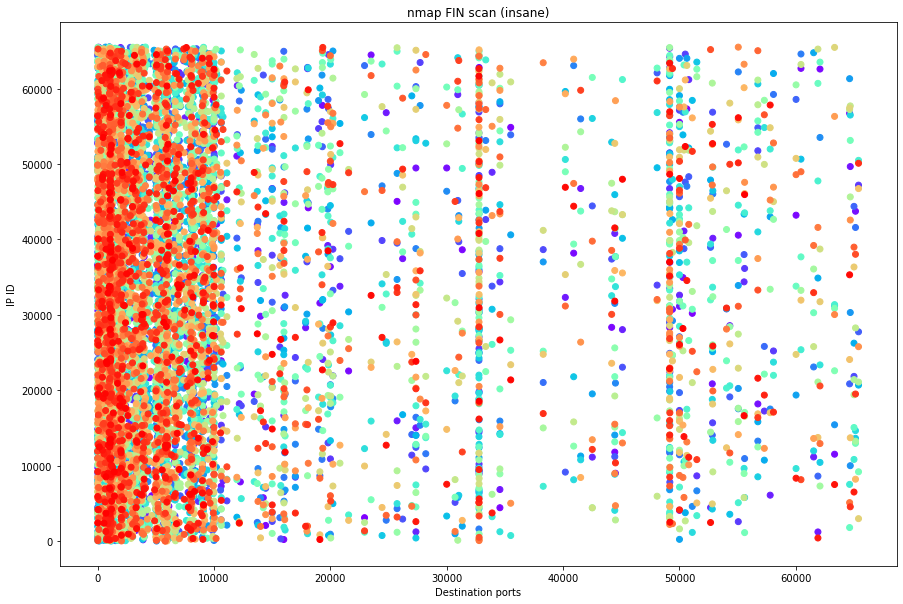

In [25]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])
if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

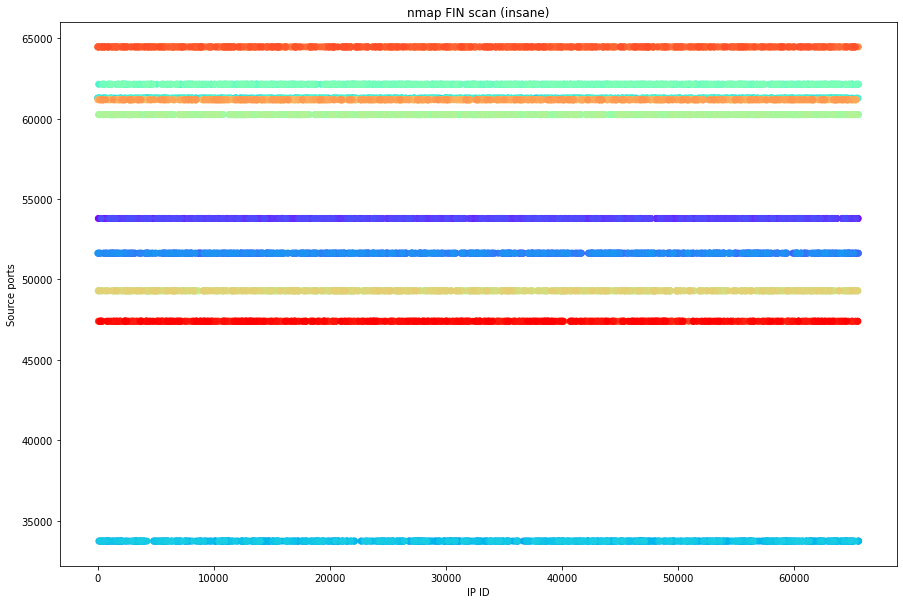

In [26]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
Sequence number: 631880786
S

Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
S

Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
Sequence number: 507256435
S

Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 3899769145
Sequence number: 389

Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 2308219516
Sequence number: 230

Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 1546726848
Sequence number: 154

Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
Sequence number: 150956777
S

Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 2623434752
Sequence number: 262

Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 1734685168
Sequence number: 173

Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 3462358337
Sequence number: 346

Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 2987233875
Sequence number: 298

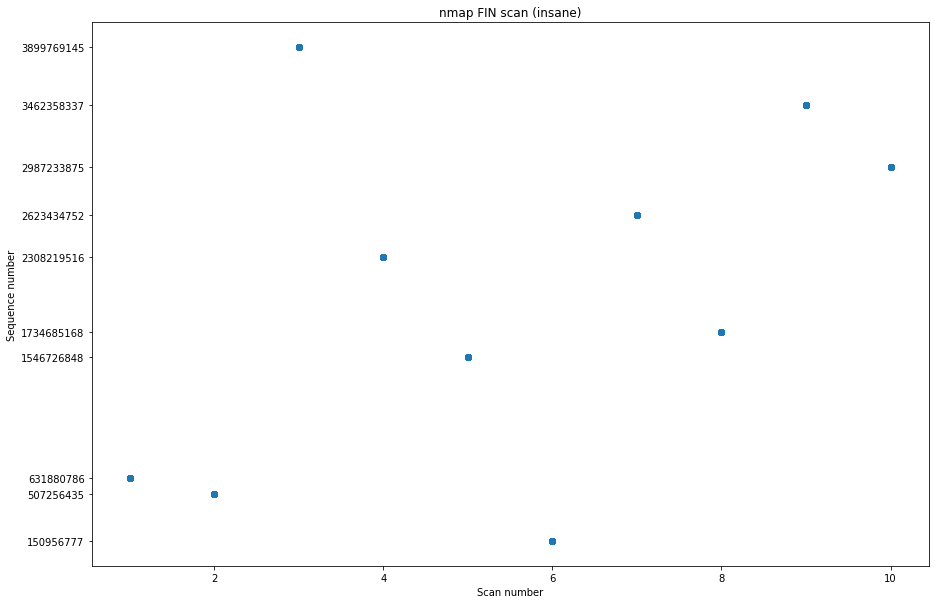

In [30]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

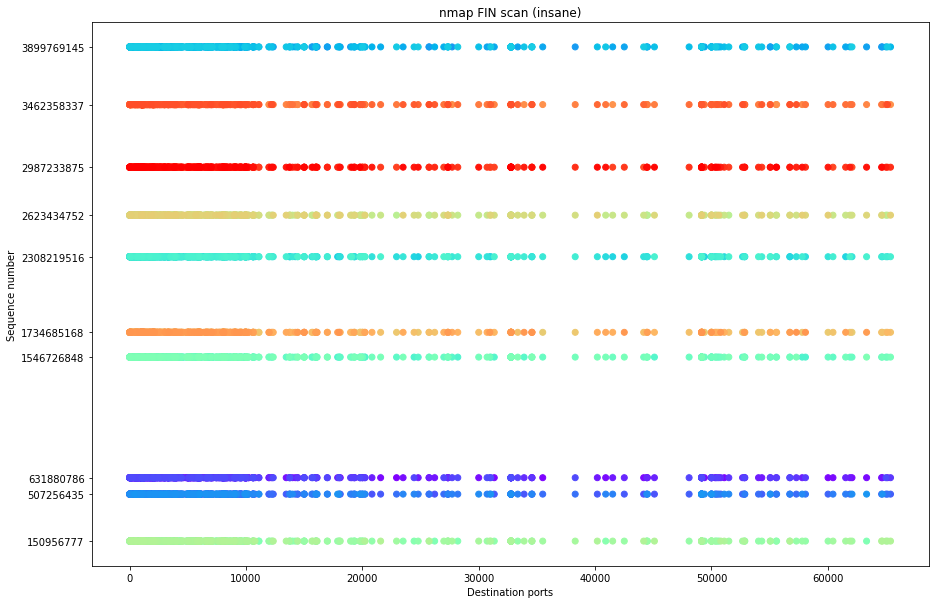

In [31]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

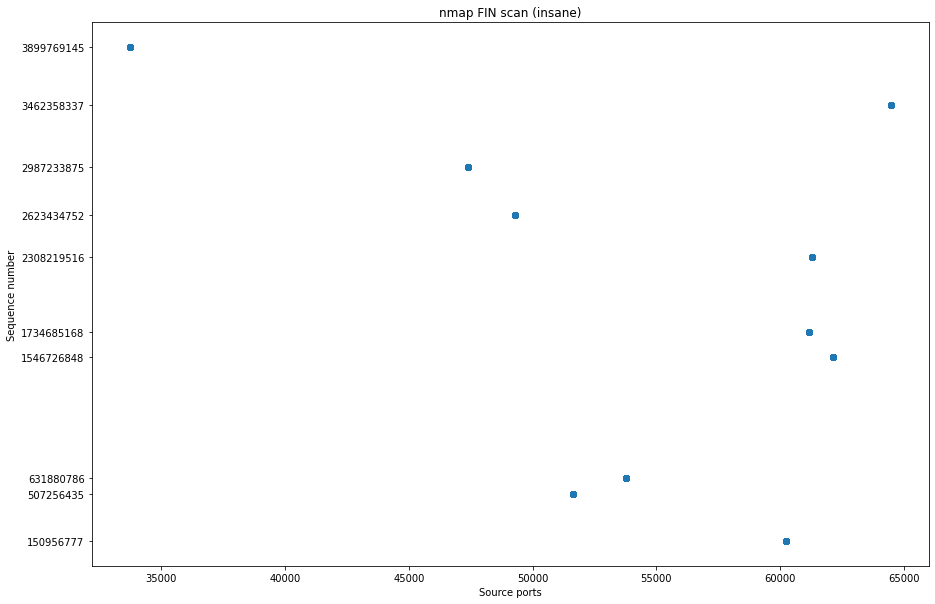

In [32]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [33]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F